<a href="https://colab.research.google.com/github/PeriniM/Multilateration/blob/main/2D_space/Multilateration_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f
from scipy.optimize import fsolve
import random as rnd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from google.colab import files

In [100]:
x1, y1, x2_gen, y2_gen, x3_gen, y3_gen, x4_gen, y4_gen, x5_gen, y5_gen = (rnd.SystemRandom().random() for x in range(10))

# Multirateration 4 points in a plane (1 known)

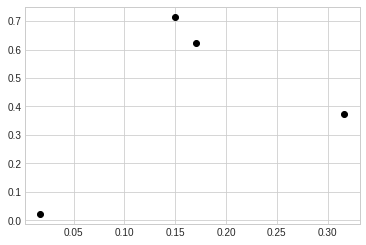

In [101]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black');

In [102]:
d12 = np.sqrt((x1-x2_gen)**2 + (y1-y2_gen)**2)
d13 = np.sqrt((x1-x3_gen)**2 + (y1-y3_gen)**2)
d14 = np.sqrt((x1-x4_gen)**2 + (y1-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

In [103]:
print(d12,d13,d14,d23,d24,d34, sep="\n")

0.3787671287745669
0.7076632797016484
0.09444052413899866
0.46428466111849837
0.28791691148971427
0.621926166047313


In [104]:
def equations(vars): 
    x2, y2, x3, y3, x4, y4 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2

    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2

    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2
    return [eq1, eq2, eq3, eq4, eq5, eq6]

In [105]:

x2, y2, x3, y3, x4, y4 =  fsolve(equations, [1,1,1,1,1,1])

print(x2, y2, x3, y3, x4, y4, sep="\n")

0.5289068402785307
0.7160187954495235
0.7152776673627304
1.1412553900348044
0.2418280825955082
0.7379718090332105


***Actual positions vs predicted positions***

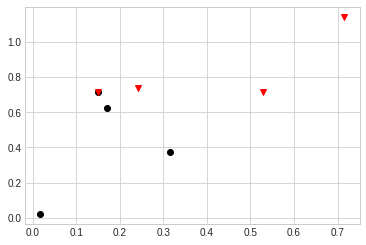

In [106]:
plt.plot([x1, x2_gen, x3_gen, x4_gen], [y1, y2_gen, y3_gen, y4_gen], 'o', color='black'); # intial points
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'v', color='red'); # calculated points

***Distance Error***

We notice that fsolve is able to give the correct distances to all the points but fails in the orientation

The predicted positions differ from the actual ones

In [107]:
p1_err = np.sqrt((x1-x1)**2 + (y1-y1)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)

print(p1_err,p2_err,p3_err,p4_err, sep="\n")

0.0
0.4017514962673924
1.3206914353189967
0.13539458639200305


# Multilateration 5 points in a plane (0 known, just relative positions)

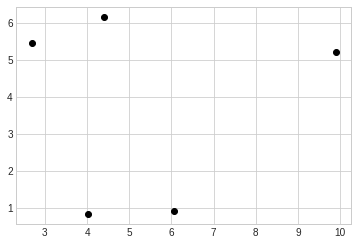

In [ ]:
x1_gen , y1_gen = (x1, y1)
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');


In [ ]:
d12 = np.sqrt((x1_gen-x2_gen)**2 + (y1_gen-y2_gen)**2)
d13 = np.sqrt((x1_gen-x3_gen)**2 + (y1_gen-y3_gen)**2)
d14 = np.sqrt((x1_gen-x4_gen)**2 + (y1_gen-y4_gen)**2)
d23 = np.sqrt((x2_gen-x3_gen)**2 + (y2_gen-y3_gen)**2)
d24 = np.sqrt((x2_gen-x4_gen)**2 + (y2_gen-y4_gen)**2)
d34 = np.sqrt((x3_gen-x4_gen)**2 + (y3_gen-y4_gen)**2)

d15 = np.sqrt((x1_gen-x5_gen)**2 + (y1_gen-y5_gen)**2)
d25 = np.sqrt((x2_gen-x5_gen)**2 + (y2_gen-y5_gen)**2)
d35 = np.sqrt((x3_gen-x5_gen)**2 + (y3_gen-y5_gen)**2)
d45 = np.sqrt((x4_gen-x5_gen)**2 + (y4_gen-y5_gen)**2)

In [ ]:
print(d12,d13,d14,d23,d24,d34,d15,d25,d35,d45, sep="\n")

4.838735314160689
5.367060274722131
2.0346344264635774
1.8653768209964223
5.669833008072849
5.512430739067212
7.337413314327337
7.221194169699947
5.5722866345514355
5.769025085038334


In [ ]:
def equations(vars): 
    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 = vars
    eq1 = (x1-x2)**2 + (y1-y2)**2 - d12**2
    eq2 = (x1-x3)**2 + (y1-y3)**2 - d13**2
    eq3 = (x1-x4)**2 + (y1-y4)**2 - d14**2

    eq4 = (x2-x3)**2 + (y2-y3)**2 - d23**2
    eq5 = (x2-x4)**2 + (y2-y4)**2 - d24**2

    eq6 = (x3-x4)**2 + (y3-y4)**2 - d34**2

    eq7 = (x1-x5)**2 + (y1-y5)**2 - d15**2
    eq8 = (x2-x5)**2 + (y2-y5)**2 - d25**2
    eq9 = (x3-x5)**2 + (y3-y5)**2 - d35**2
    eq10 = (x4-x5)**2 + (y4-y5)**2 - d45**2
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10]

In [ ]:
x1, y1, x2, y2, x3, y3, x4, y4, x5, y5 =  fsolve(equations, [1,1,1,1,1,1,1,1,1,1])

print(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, sep="\n")

-2.56486539255827
-4.500143045979351
2.0318414753028113
-2.9889695245561536
1.64027218343008
-1.1651536966742404
-3.633718025218855
-2.7688743495939945
-2.2439442978955606
2.8302487441763136


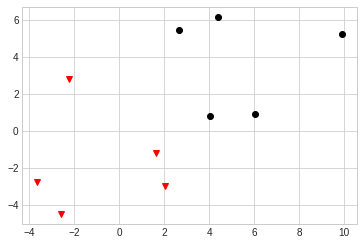

In [ ]:
plt.plot([x1_gen, x2_gen, x3_gen, x4_gen, x5_gen], [y1_gen, y2_gen, y3_gen, y4_gen,y5_gen], 'o', color='black');
plt.plot([x1, x2, x3, x4, x5], [y1, y2, y3, y4, y5], 'v', color='red'); # calculated points

***Distance Error***

In [ ]:
p1_err = np.sqrt((x1-x1_gen)**2 + (y1-y1_gen)**2)
p2_err = np.sqrt((x2-x2_gen)**2 + (y2-y2_gen)**2)
p3_err = np.sqrt((x3-x3_gen)**2 + (y3-y3_gen)**2)
p4_err = np.sqrt((x4-x4_gen)**2 + (y4-y4_gen)**2)
p5_err = np.sqrt((x5-x5_gen)**2 + (y5-y5_gen)**2)

print(p1_err,p2_err,p3_err,p4_err,p5_err, sep="\n")

8.46855519606619
8.479347800780262
7.840873225415616
10.367436506388056
12.37580833528768


# Multi Output Regression Model

In [97]:
dim_dataset = 10000
model_input = np.empty((dim_dataset, 8))
model_output = np.empty((dim_dataset, 6))

for sample in range(dim_dataset):
  x1, y1, x2, y2, x3, y3, x4, y4 = (rnd.SystemRandom().random() for x in range(8))
  d12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
  d13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
  d14 = np.sqrt((x1-x4)**2 + (y1-y4)**2)
  d23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
  d24 = np.sqrt((x2-x4)**2 + (y2-y4)**2)
  d34 = np.sqrt((x3-x4)**2 + (y3-y4)**2)
  model_input[sample][:] = [x1, y1, d12, d13, d14, d23, d24, d34]
  model_output[sample][:] = [x2, x3, x4, y2, y3, y4]


In [98]:
dim_test = 100
model_input_test = np.empty((dim_test, 8))
model_output_test = np.empty((dim_test, 6))

for sample in range(dim_test):
  x1, y1, x2, y2, x3, y3, x4, y4 = (rnd.SystemRandom().random() for x in range(8)) 
  d12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
  d13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
  d14 = np.sqrt((x1-x4)**2 + (y1-y4)**2)
  d23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
  d24 = np.sqrt((x2-x4)**2 + (y2-y4)**2)
  d34 = np.sqrt((x3-x4)**2 + (y3-y4)**2)
  model_input_test[sample][:] = [x1, y1, d12, d13, d14, d23, d24, d34]
  model_output_test[sample][:] = [x2, x3, x4, y2, y3, y4]

In [99]:
# use mlp for prediction on multi-output regression
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(30, input_dim=n_inputs, kernel_initializer='he_uniform', activation='selu'))
  model.add(Dense(30, kernel_initializer='he_uniform', activation='selu'))
  model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
  model.compile(loss='mae', optimizer='adam')
  return model

X, y = (model_input, model_output)
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, epochs=50)
# make a prediction for new data
row = model_input_test[0][:]
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

Epoch 1/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3706
Epoch 2/50
313/313 [==============================] - 3s 11ms/step - loss: 0.2390
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2285
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 0.2216
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 0.2167
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2133
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 0.2094
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2076
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2057
Epoch 10/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2035
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2027
Epoch 12/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2009
Epoch 13/50
313/313 [===

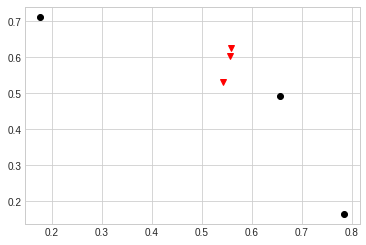

In [96]:
plt.plot(model_output_test[0][:3], model_output_test[0][3:], 'o', color='black') # intial points
plt.plot(yhat[0][:3], yhat[0][3:], 'v', color='red') # calculated points